# ML - Aprendizaje No Supervisado

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar el dataset
data = pd.read_csv('chineseMNIST.csv')

In [2]:
# Visualizar las primeras filas del DataFrame para entender su estructura
print(data.head())

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_4088  pixel_4089  pixel_4090  pixel_4091  \
0        0        0  ...           0           0           0           0   
1        0        0  ...           0           0           0           0   
2        0        0  ...           0           0           0           0   
3        0        0  ...           0           0           0           0   
4        0        0  ...           0           0           0           0   

   pixel_4092  pixel_4093  pixel_4094  pixel_4095  label  character  
0         

In [3]:
# Extraer las imágenes y etiquetas
images = data.iloc[:, :-2].values
labels = data['label'].values
characters = data['character'].values

In [4]:
# Normalizar los datos
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

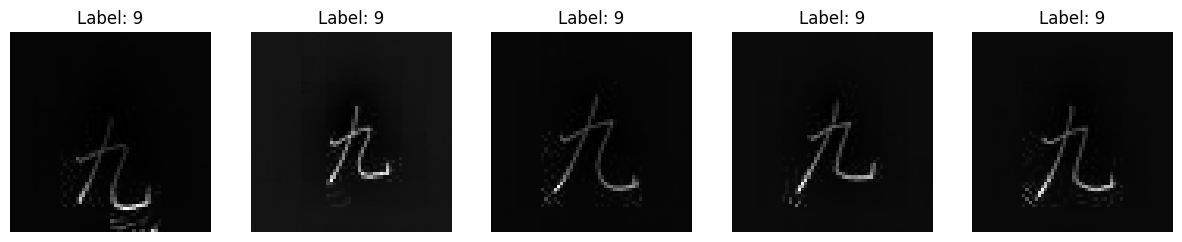

In [5]:
# Mostrar algunas imágenes
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(images_scaled[i].reshape(64, 64), cmap='gray')
    ax[i].title.set_text('Label: ' + str(labels[i]))
    ax[i].axis('off')
plt.show()

### Encontrando el número óptimo de grupos

1. Calculando coeficiente de Silueta para Diferentes Números de Clusters
Primero, necesitas calcular el score de silueta para una serie de valores de k (número de clusters) para ver cuál ofrece la mejor puntuación. El score de silueta mide cuán similar es un objeto a su propio cluster comparado a otros clusters.

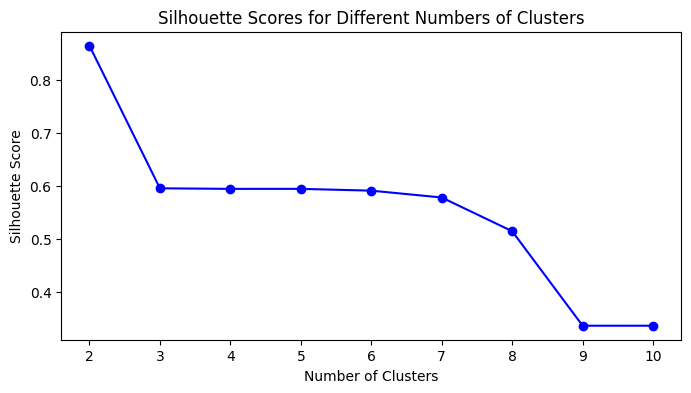

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# seed fixing
SEED = 42 # Para reproducibilidad

# Preparar el rango de números de clusters a evaluar
range_values = range(2, 11) #representa los diferentes números de grupos que queremos probar, desde 2 hasta 11.
silhouette_scores = [] #silhouette Score para determinar el número óptimo de grupos (clusters)

# Calcular el score de silueta para cada número de clusters
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=SEED)
    kmeans.fit(images_scaled)
    score = silhouette_score(images_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico de los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_values, silhouette_scores, "bo-")
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Se observa que el score más alto ocurre con 2 clusters, lo cual sugiere que este es el número óptimo de grupos para este conjunto de datos, dado que los scores disminuyen consistentemente a medida que se aumenta el número de clusters más allá de este punto.

### 2.  Visualización de los Diagramas de Silueta
También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

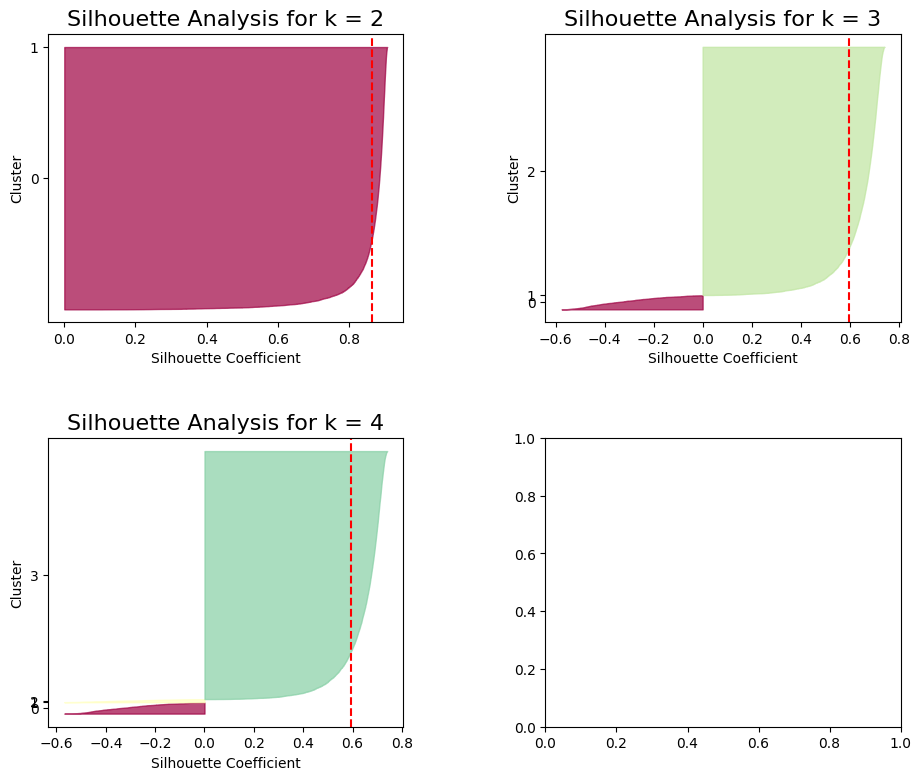

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_diagrams(images_scaled, range_k):
    fig, axs = plt.subplots(2, 2, figsize=(11, 9))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, k in enumerate(range_k):
        ax = axs[i // 2, i % 2]
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(images_scaled)
        silhouette_coefficients = silhouette_samples(images_scaled, y_pred)

        silhouette_avg = silhouette_score(images_scaled, y_pred)
        ticks = []
        y_lower = 10

        for j in range(k):
            jth_cluster_silhouette_values = silhouette_coefficients[y_pred == j]
            jth_cluster_silhouette_values.sort()

            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j

            color = mpl.cm.Spectral(j / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append((y_lower + y_upper) / 2)
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks(ticks)
        ax.set_yticklabels(range(k))
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette Coefficient')
        ax.set_title(f'Silhouette Analysis for k = {k}', fontsize=16)

    plt.show()

# Llama a la función con el rango de k que deseas analizar
plot_silhouette_diagrams(images_scaled, range(2, 5))

### K-Means
Ahora que identificamos un número apropiado de clusters (4), el siguiente paso  sería aplicar el algoritmo K-Means con este número de clusters y luego interpretar los resultados para comprender mejor cómo se agrupan los datos y cuáles son las características comunes dentro de cada cluster.

K-Means es un método popular de clustering (agrupamiento) que se utiliza para dividir un conjunto de datos en grupos (clusters) que contienen puntos similares. Aquí te explico cómo funciona K-Means en el análisis de datos de manera sencilla:

1.-Escoger el número de clusters (K): Primero, decides cuántos grupos quieres formar. Este número se llama 'K'.

2.-Seleccionar centros iniciales: Al azar o por un método más sistemático, se eligen 'K' puntos del conjunto de datos como los centros iniciales de los clusters. Estos puntos se llaman "centroides".

In [28]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=SEED)
y_pred = kmeans.fit_predict(images_scaled)

# Centros de los clusters
centroids = kmeans.cluster_centers_
print("Centros de Clusters:", centroids)

Centros de Clusters: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.51604765e-02
  -1.55895561e-02 -1.39023042e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.05197613e+01
  -1.55895561e-02  8.33999230e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.12048064e-01
   1.24377084e+00  7.30863993e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.24910026e-02
  -1.40209693e-02 -1.39023042e-02]]


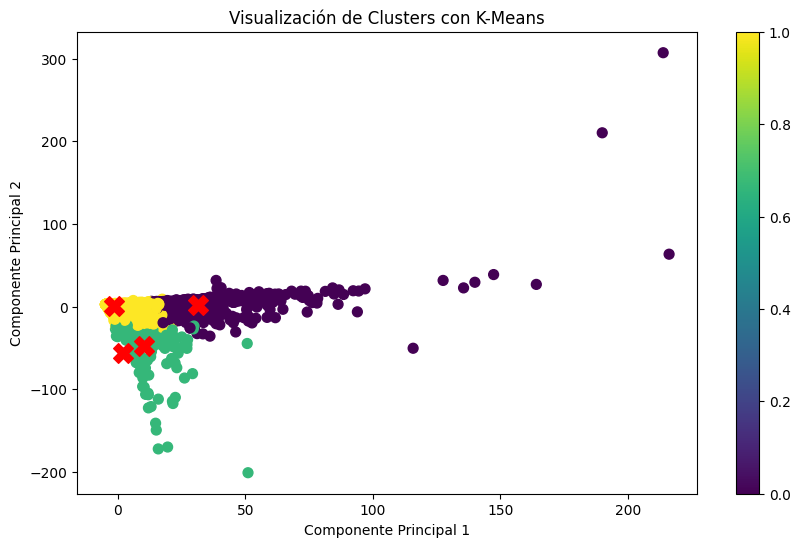

In [29]:
# Aqui vamos a reducir la dimensionalidad del conjunto de datos y visualizar los clusters usando PCA (Análisis de Componentes Principales) 

from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2) # PCA configurado para reducir los datos a 2 componentes principales. Esto significa que transforma el conjunto de datos original, 
                          #que puede tener muchas dimensiones (variables), a un nuevo conjunto de solo 2 dimensiones que capturan la mayor parte de la variabilidad de los datos.
df_reduced = pca.fit_transform(images_scaled)

# Función para visualizar los clusters
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='X')  # Marcadores para los centros
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title("Visualización de Clusters con K-Means")
    plt.colorbar()

# Preparación de los datos para la visualización
centroids_reduced = pca.transform(centroids)  # Reducir la dimensión de los centros también

# Llamada a la función de visualización
plt.figure(figsize=(10, 6))
plot_clusters(df_reduced, y_pred, centroids_reduced)
plt.show()


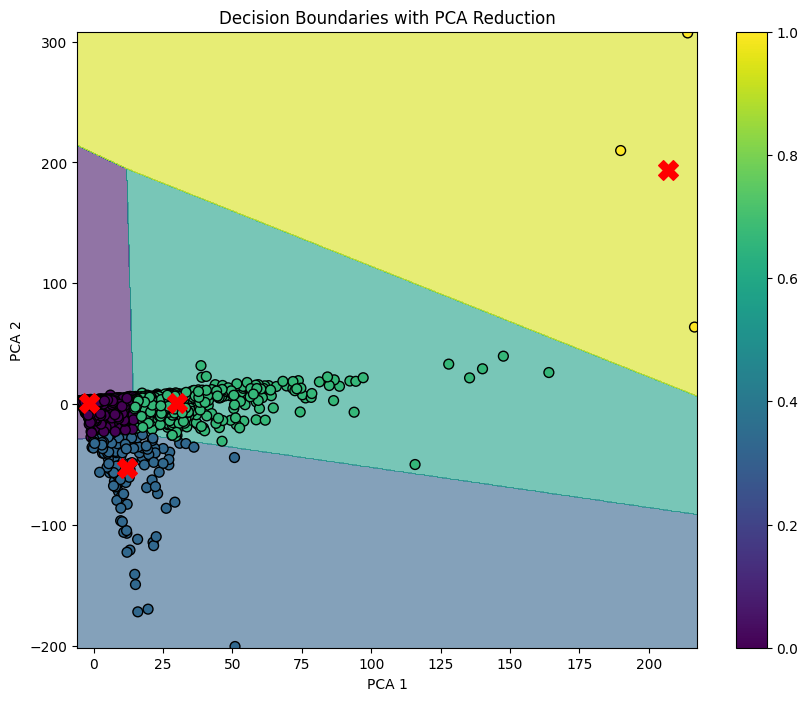

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Suponemos que 'images_scaled' está definido previamente y 'SEED' también.
# Aplicar PCA para reducción a dos dimensiones
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(images_scaled)

# Aplicar K-Means con 4 clusters sobre los datos reducidos
kmeans = KMeans(n_clusters=4, random_state=SEED)
kmeans.fit(df_reduced)

# Función para visualizar los límites de decisión y los centroides
def plot_decision_boundaries(clusterer, X):
    margin = 1  # Define un margen para visualizar alrededor de los centroides
    
    # Genera una malla de puntos para cubrir el espacio de características
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    # Predecir los clusters para cada punto en la malla
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualizar el resultado usando un color para cada cluster
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_, s=50, cmap='viridis', edgecolors='k')
    plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=200, color='red', marker='X')  # Centroides
    plt.title("Decision Boundaries with PCA Reduction")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar()
    plt.show()

# Visualizar los límites de decisión y centroides
plot_decision_boundaries(kmeans, df_reduced)



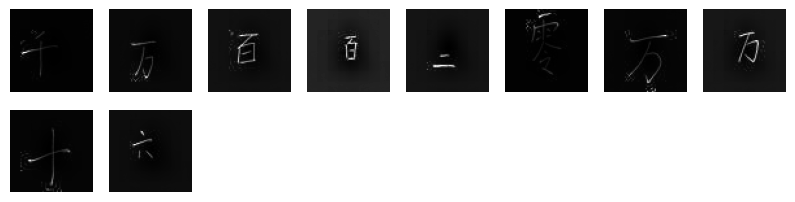

In [62]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Asumimos que 'images_scaled' contiene las imágenes y 'labels' las etiquetas numéricas
X_train, X_test, y_train, y_test = train_test_split(
    images_scaled, labels, test_size=0.25, random_state=42)

# Suponiendo que quieres algunos índices representativos de forma manual o algún método específico
# Por ahora, simplemente tomaremos algunos índices al azar para la demostración
idxs = np.random.choice(len(X_train), 10, replace=False)
X_representative_digits = X_train[idxs]

plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(4, 8, index+1)  # Ajustar para mostrar 10 imágenes
    plt.imshow(X_representative_digit.reshape(64, 64), cmap="gray")
    plt.axis('off')
plt.show()


El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas :p).


In [52]:
y_representative_digits = y_train[idxs]

Y entrenaremos un clasificados usando estas imágenes representativas.


In [53]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

CPU times: total: 31.2 ms
Wall time: 95.8 ms


0.084

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [60]:
# y_train_propagated = np.empty(len(X_train))
# for i in range(k):
#   y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [61]:
# log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
# %time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
# log_reg3.score(X_test, y_test)

##### Visualizar la Evolución del K-Means


Aqui vamos a ahcer varias iteraciones.

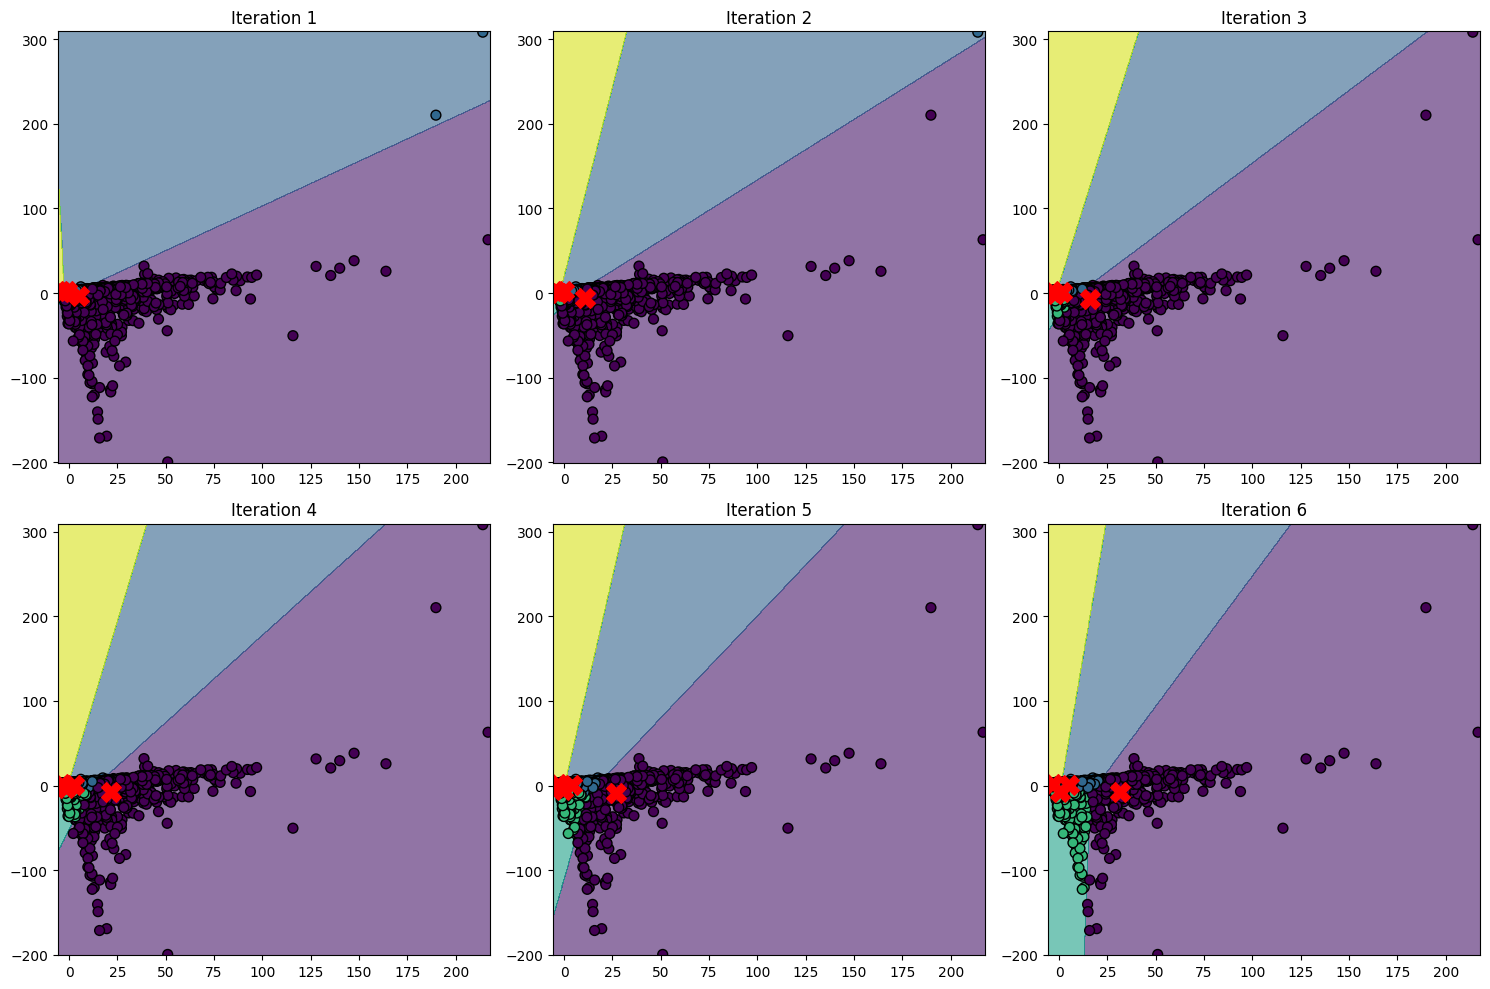

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Preparación de PCA y reducción de datos
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(images_scaled)

def plot_kmeans_iterations(df_reduced, n_clusters, n_init, max_iters, random_state):
    # Configuración de los subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(1, max_iters + 1):
        # Instancia de KMeans con diferentes iteraciones máximas
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=n_init, max_iter=i, random_state=random_state)
        kmeans.fit(df_reduced)

        # Límites para la malla de visualización
        x_min, x_max = df_reduced[:, 0].min() - 1, df_reduced[:, 0].max() + 1
        y_min, y_max = df_reduced[:, 1].min() - 1, df_reduced[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

        # Predecir los clusters para cada punto en la malla
        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Visualización de los límites de decisión
        axes[i-1].contourf(xx, yy, Z, alpha=0.6, cmap='viridis')
        axes[i-1].scatter(df_reduced[:, 0], df_reduced[:, 1], c=kmeans.labels_, s=50, cmap='viridis', edgecolors='k')
        axes[i-1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red', marker='X')
        axes[i-1].set_title(f'Iteration {i}')
        axes[i-1].set_xlim([x_min, x_max])
        axes[i-1].set_ylim([y_min, y_max])

    plt.tight_layout()
    plt.show()

plot_kmeans_iterations(df_reduced, n_clusters=4, n_init=1, max_iters=6, random_state=SEED)


Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.


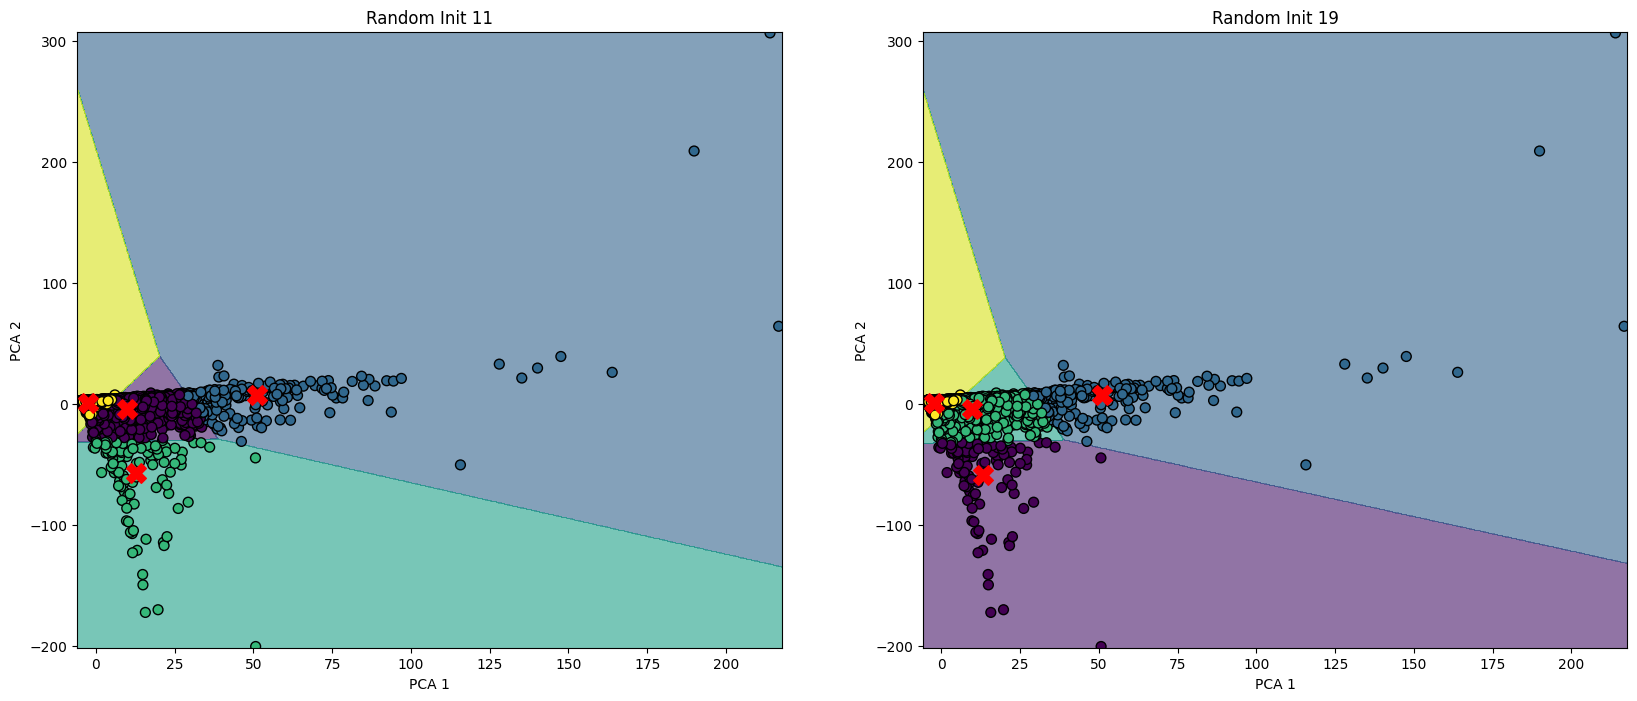

In [39]:
#visualizar y comparar los resultados de K-Means con diferentes inicializaciones aleatorias de los centroides
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(images_scaled)

# Modificación de la función para aceptar un eje de Matplotlib
def plot_decision_boundaries(clusterer, X, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=clusterer.labels_, s=50, cmap='viridis', edgecolors='k')
    ax.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=200, color='red', marker='X')
    ax.set_title("Decision Boundaries with PCA Reduction")
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

# Configuración de la comparación
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# KMeans con diferentes inicializaciones aleatorias
kmeans_rnd_init1 = KMeans(n_clusters=4, init="random", n_init=1, max_iter=300, random_state=11)
kmeans_rnd_init1.fit(df_reduced)
plot_decision_boundaries(kmeans_rnd_init1, df_reduced, axs[0])
axs[0].set_title('Random Init 11')

kmeans_rnd_init2 = KMeans(n_clusters=4, init="random", n_init=1, max_iter=300, random_state=19)
kmeans_rnd_init2.fit(df_reduced)
plot_decision_boundaries(kmeans_rnd_init2, df_reduced, axs[1])
axs[1].set_title('Random Init 19')

plt.show()


Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.


In [42]:
kmeans_rnd_10_inits = KMeans(n_clusters=4, init="random", n_init=10,
                              algorithm="lloyd", random_state=11)
kmeans_rnd_10_inits.fit(df_reduced)

KMeans(init='random', n_clusters=4, n_init=10, random_state=11)

In [43]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, df_reduced, axs[0])
plt.show()

<Figure size 800x400 with 0 Axes>

In [9]:
# Aplicar K-Means
k = 15  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(images_scaled)
clusters



array([3, 8, 3, ..., 8, 8, 8])

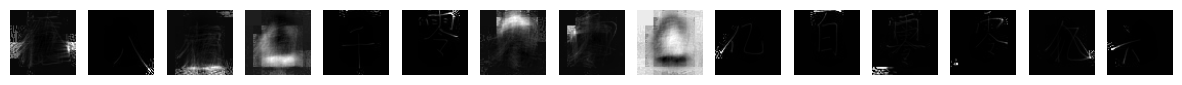

In [10]:
# Visualizar los centros de clusters
fig, ax = plt.subplots(1, k, figsize=(15, 3))
for i in range(k):
    ax[i].imshow(kmeans.cluster_centers_[i].reshape(64, 64), cmap='gray')
    ax[i].axis('off')
plt.show()

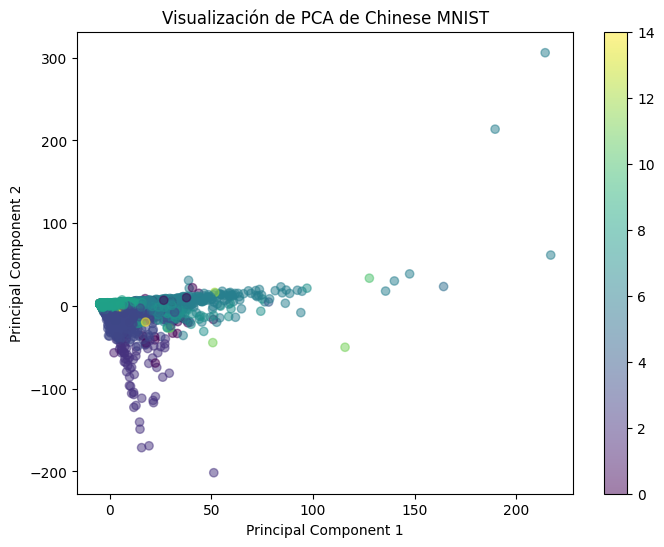

In [7]:
# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(images_scaled)

# Visualizar los datos en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title('Visualización de PCA de Chinese MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
## Conclusiones
En este cuaderno, hemos aplicado técnicas de aprendizaje no supervisado para explorar y agrupar el dataset Chinese MNIST. Los métodos utilizados incluyen K-Means para clustering y PCA para visualización de los datos. El Silhouette Score obtenido nos ayuda a entender la cohesión y separación de los clusters formados.

## Futuras Direcciones
Podemos explorar más algoritmos de clustering o técnicas avanzadas de reducción de dimensionalidad para mejorar nuestra comprensión y manejo de imágenes complejas como las de este dataset.
